<a href="https://colab.research.google.com/github/zihanzhao1029/ML-project_HW1/blob/main/report_on_U_N_World_Happiness_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Github repo link: https://github.com/zihanzhao1029/ML-project_HW1/blob/main/report_on_U_N_World_Happiness_Data.ipynb

# 1.Explore bivariate results (Use visualizations!)
Describe any relationships you see between particular features and the target variable

In [ ]:
# import world happiness data
import pandas as pd
X_train = pd.read_csv('/content/X_train.csv')
X_test = pd.read_csv('/content/X_test.csv')
y_train = pd.read_csv('/content/y_train.csv')
y_train_labels = y_train.idxmax(axis=1)
X_train.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks
0,Peru,0.960,1.274,0.854,0.455,0.083,0.027,Peru,Americas,Latin America and the Caribbean,18.000000
1,Nicaragua,0.694,1.325,0.835,0.435,0.200,0.127,Nicaragua,Americas,Latin America and the Caribbean,125.611111
2,Greece,1.181,1.156,0.999,0.067,0.000,0.034,Greece,Europe,Southern Europe,112.000000
3,Qatar,1.684,1.313,0.871,0.555,0.220,0.167,Qatar,Asia,Western Asia,57.333333
4,Uzbekistan,0.745,1.529,0.756,0.631,0.322,0.240,Uzbekistan,Asia,Central Asia,125.611111


In [ ]:
print(X_train.shape)
y_train_labels

### From scatterplot below, we can clearly observe that there is postive relationship between GDP per captial , healthy life expectancy and world happiness, while the terrorist attacks negatively effects the level of world happiness.

In [ ]:
# Convert happiness level into numerical terms
y_train_labels.replace(['Very Low', 'Low','Average','High','Very High'],
                        [0,1,2,3,4], inplace=True)

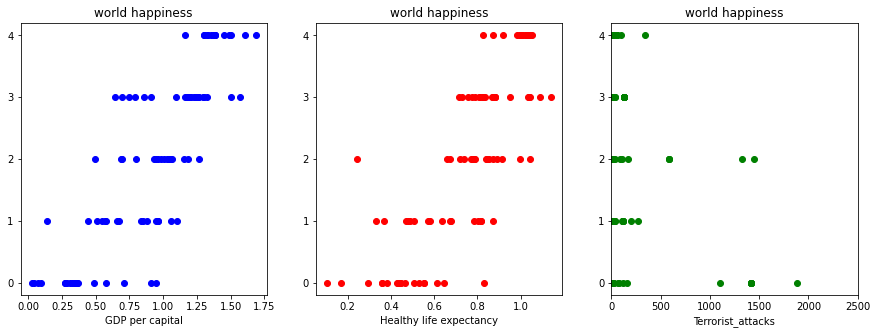

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns #created fit line

plt.rcParams["figure.figsize"] = [15, 5]


# put all histograms together

fig, axes = plt.subplots(1, 3)

axes[0].scatter(x = X_train['GDP per capita'], y = y_train_labels,c='blue')
axes[0].set_xlabel('GDP per capital')
axes[0].set_title('world happiness')
axes[0].set_yticks(np.arange(0, 5, 1)) 

axes[1].scatter(x = X_train['Healthy life expectancy'], y = y_train_labels,c='red')
axes[1].set_xlabel('Healthy life expectancy')
axes[1].set_title('world happiness')
axes[1].set_yticks(np.arange(0,5, 1)) 


axes[2].scatter(x = X_train['Terrorist_attacks'], y =y_train_labels,c='green')
axes[2].set_xlabel('Terrorist_attacks')
axes[2].set_title('world happiness')
axes[2].set_xlim([0,2500])
axes[2].set_yticks(np.arange(0,5, 1)) 
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# We create the preprocessing pipelines for both numeric and categorical data.

numeric_features = X_train.drop(['Country or region', 'name', 'region', 'sub-region'],axis=1)

numeric_features=numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['region', 'sub-region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train)

In [ ]:
# Write function to transform data with preprocessor
def preprocessor(X_train):
    X_train = X_train.drop(['Country or region', 'name'], axis=1)
    preprocessed_data = preprocess.transform(X_train)
    return preprocessed_data

In [ ]:
preprocessor(X_train).shape

# 2.Examine features that predict happiness categories using one or more models that allow for automatic feature selection
 Explain any meaningful findings

### Findings: Given the feature ranking of RFE, column 0, column1, column2 ,column3, and column5 are the important features to predict world happiness categories 

In [ ]:
# Using Recursive Feature Elimination to find important features

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

estimator = RandomForestClassifier().fit(preprocessor(X_train), y_train_labels) #model with all X variables


selector = RFE(estimator, n_features_to_select=5, step=1) # step tells RFE how many features to remove each time model features are evaluated

selector = selector.fit(preprocessor(X_train), y_train_labels) # fit RFE estimator.

print("Num Features: "+str(selector.n_features_))
print("Selected Features: "+str(selector.support_)) # T/F for top five features
print("Feature Ranking: "+str(selector.ranking_))  # ranking for top five + features

Num Features: 5
Selected Features: [ True  True  True  True False  True False False False False False False
 False False False False False False False False False False False False
 False False]
Feature Ranking: [ 1  1  1  1  2  1  3  7  9  5  8 22 21 15 19 16  6 18 20 17 14 11 10  4
 12 13]


In [ ]:
# see which features are selected 
for i in range(preprocessor(X_train).shape[1]):
 print('Column: %d, Selected %s, Rank: %.3f' % (i,selector .support_[i],selector.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected False, Rank: 2.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected False, Rank: 3.000
Column: 7, Selected False, Rank: 7.000
Column: 8, Selected False, Rank: 9.000
Column: 9, Selected False, Rank: 5.000
Column: 10, Selected False, Rank: 8.000
Column: 11, Selected False, Rank: 22.000
Column: 12, Selected False, Rank: 21.000
Column: 13, Selected False, Rank: 15.000
Column: 14, Selected False, Rank: 19.000
Column: 15, Selected False, Rank: 16.000
Column: 16, Selected False, Rank: 6.000
Column: 17, Selected False, Rank: 18.000
Column: 18, Selected False, Rank: 20.000
Column: 19, Selected False, Rank: 17.000
Column: 20, Selected False, Rank: 14.000
Column: 21, Selected False, Rank: 11.000
Column: 22, Selected False, Rank: 10.000
Column: 23, Selected False, Rank: 4.000
Column: 24, Selected False, Rank: 12.000
Col

In [ ]:
# automatically select the number of features using Grid search CV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std

rfe = RFECV(estimator=RandomForestClassifier())
model = RandomForestClassifier()
# create pipline
pipeline = Pipeline(steps=[('r',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline,preprocessor(X_train),y_train_labels, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('RandomForestClassifier Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

RandomForestClassifier Accuracy: 0.669 (0.146)


# 3.Experiment with different prediction models to try to predict World Happiness well (Fit and compare, at minimum, three models)
submit three models to the model share leaderboard before you start communicating with your team.
After you submit your first three models, describe your best model with your team via your team slack channel
Fit and submit up to three more models after learning from your team.
Discuss which models you tried and which models performed better and point out relevant hyper-parameter values for successful models.
Submit your best models to the leaderboard for the World Happiness AI Model Share competition.
You have the option to present and/or discuss these models in your report, but it is not required.


In [ ]:
# Model 1 with GridSearch CV for world happiness data

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {'n_estimators': np.arange(100, 150, 200),'max_depth':[1,2,3],'random_state':[1,3,5]} #np.arange creates sequence of numbers for each k value

gridmodel = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=10)

#use meta model methods to fit score and predict model:
gridmodel.fit(preprocessor(X_train), y_train_labels)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("best parameters: {}".format(gridmodel.best_params_))


best mean cross-validation score: 0.660
best parameters: {'max_depth': 3, 'n_estimators': 100, 'random_state': 1}


In [ ]:
# Model 2 with GridSearch CV for world happiness data (best model so far)

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {'n_estimators': np.arange(50, 100, 150),'learning_rate':[0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
              ,'max_features':[1,2,3,4,5],'max_depth':[1, 3, 5],'random_state':[3,5,10]} #np.arange creates sequence of numbers for each k value

grid_gb_clf = GridSearchCV(GradientBoostingClassifier(), param_grid=param_grid, cv=10)

#use meta model methods to fit score and predict model:
grid_gb_clf.fit(preprocessor(X_train), y_train_labels)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(grid_gb_clf.best_score_))
print("best parameters: {}".format(grid_gb_clf.best_params_))

best mean cross-validation score: 0.729
best parameters: {'learning_rate': 0.25, 'max_depth': 1, 'max_features': 2, 'n_estimators': 50, 'random_state': 5}


In [ ]:
# Model 3 with GridSearch CV for world happiness data

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

param_grid = {'var_smoothing': np.logspace(0,-9, num=10)} #np.arange creates sequence of numbers for each k value

nbmodel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid, verbose=1,cv=5)
nbmodel_grid.fit(preprocessor(X_train), y_train_labels)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(nbmodel_grid.best_score_))
print("best parameters: {}".format(nbmodel_grid.best_params_))

Fitting 10 folds for each of 10 candidates, totalling 100 fits
best mean cross-validation score: 0.674
best parameters: {'var_smoothing': 0.7742636826811271}


After from learning

In [ ]:
# Fit and sumbit model after learning from team
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {'n_estimators': np.arange(10, 50, 100),'learning_rate':[1]
              ,'max_features':[1,2,3],'max_depth':[1,2,3],'random_state':[3]} #np.arange creates sequence of numbers for each k value

grid_gb_clf = GridSearchCV(GradientBoostingClassifier(), param_grid=param_grid, cv=10)

#use meta model methods to fit score and predict model:
grid_gb_clf.fit(preprocessor(X_train), y_train_labels)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(grid_gb_clf.best_score_))
print("best parameters: {}".format(grid_gb_clf.best_params_))

best mean cross-validation score: 0.613
best parameters: {'learning_rate': 1, 'max_depth': 1, 'max_features': 3, 'n_estimators': 10, 'random_state': 3}


In [ ]:
# Fit and sumbit model after learning from team
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

feature_count=preprocessor(X_train).shape[1] #count features in input data

keras_model = Sequential()
keras_model.add(Dense(128, input_dim=feature_count, activation='relu'))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(32, activation='relu'))

keras_model.add(Dense(5, activation='sigmoid')) 
                                            
# Compile model
keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fitting the NN to the Training set
keras_model.fit(preprocessor(X_train), y_train, ## Note that keras models require a one-hot-encoded y_train object
               batch_size = 20, 
               epochs = 300, validation_split=0.25)

In [ ]:
# Fit and sumbit model after learning from team
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {'n_estimators': np.arange(25, 50,100),'max_depth':[1,2,3,4,5]} #np.arange creates sequence of numbers for each k value

gridmodel = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=10)

#use meta model methods to fit score and predict model:
gridmodel.fit(preprocessor(X_train), y_train_labels)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("best parameters: {}".format(gridmodel.best_params_))

best mean cross-validation score: 0.706
best parameters: {'max_depth': 5, 'n_estimators': 25}


### Discuss which models you tried and which models performed better and point out relevant hyper-parameter values for successful models.

I tried RandomForestClassifier,GradientBoostingClassifier,GaussianNB and deep learning model with keras. The GradientBoostingClassifier model performed better with learning_rate: 0.25,max_depth: 1, max_features: 2 and n_estimators: 50, random_state: 5